### Librerias

In [102]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
from shapely.geometry import Point

<hr></hr>

### Carga de Datos

In [103]:
df = pd.read_csv('./iFlowDatos.csv')

Entendimiento del Dataset

In [104]:
df.head(3)

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000


In [105]:
# Vemos cuantos valores faltantes hay en cada columna
df.isna().sum()

iddomicilioorden            0
direccion                   0
localidad                   0
InicioHorario1              0
FinHorario1                 0
latitud                    41
longitud                   41
cliente                     0
mes                         0
Bultos                      0
Peso                        0
Unidades                    0
InicioVisitaPlanificado     0
FinVisitaPlanificado        0
InicioVisitaReal           52
FinVisitaReal              52
dtype: int64

In [106]:
# Vemos cuantos valores únicos hay en cada columna
df.nunique()

iddomicilioorden            6593
direccion                   6072
localidad                     44
InicioHorario1                 3
FinHorario1                    3
latitud                     5887
longitud                    5891
cliente                        2
mes                            3
Bultos                      2391
Peso                        8027
Unidades                     377
InicioVisitaPlanificado     6797
FinVisitaPlanificado        6797
InicioVisitaReal           16357
FinVisitaReal              16309
dtype: int64

In [107]:
# Vemos el tamaño del dataset
df.shape

(27484, 16)

In [108]:
# Vemos con que tipo de dato fueron cargadas cada una de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27484 entries, 0 to 27483
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iddomicilioorden         27484 non-null  int64  
 1   direccion                27484 non-null  object 
 2   localidad                27484 non-null  object 
 3   InicioHorario1           27484 non-null  int64  
 4   FinHorario1              27484 non-null  int64  
 5   latitud                  27443 non-null  float64
 6   longitud                 27443 non-null  float64
 7   cliente                  27484 non-null  int64  
 8   mes                      27484 non-null  int64  
 9   Bultos                   27484 non-null  float64
 10  Peso                     27484 non-null  float64
 11  Unidades                 27484 non-null  int64  
 12  InicioVisitaPlanificado  27484 non-null  object 
 13  FinVisitaPlanificado     27484 non-null  object 
 14  InicioVisitaReal      

Manejo de Datos Faltantes, Erroneos y Duplicados

El iddomicilioorden es el un identificador del domicilio de entrega, es decir, deberia tener únicamente una dirección, localidad, latitud y longitud específica.

Vamos a ver si existen domicilios que tienen más de una dirección, localidad, o coordenadas.

In [109]:
# Obtenemos un dataframe en el que se tiene todas las direcciones de las que existen sus coordenadas
iddomicilioorden_df = df[['iddomicilioorden','direccion','localidad','latitud','longitud']].dropna().drop_duplicates().reset_index(drop=True)

# Obtenemos los iddomicilioorden que tienen más de una dirección, localidad o coordenada. 
iddomicilioorden_duplicados = iddomicilioorden_df[iddomicilioorden_df.iddomicilioorden.duplicated()].iddomicilioorden.tolist()

# Obtenemos toda la información de los iddomicilioorden duplicados
iddomicilioorden_duplicated_df = iddomicilioorden_df[iddomicilioorden_df['iddomicilioorden'].isin(iddomicilioorden_duplicados)]
iddomicilioorden_duplicated_df.reset_index(drop=True)

,iddomicilioorden,direccion,localidad,latitud,longitud
0,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,-34.603996,-58.387488
1,75571,PARANA 465,CAPITAL FEDERAL,-34.603996,-58.387488
2,79502,AV SAN JUAN 3521,CAPITAL,-34.625230,-58.414991
3,79502,AV SAN JUAN 3645,CAPITAL,-34.625230,-58.414991
4,80956,MUÑECAS 1150,CAPITAL FEDERAL,-34.597605,-58.449185
5,80956,AV. LIBERTADOR 3883 LOC 10,CAPITAL FEDERAL,-34.597605,-58.449185
6,81596,AV RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
7,81596,RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
8,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.583381,-58.433890
9,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.580419,-58.436290


In [110]:
# Con el fin de mantener una consistencia con las direcciones, vamos a tomar la primer direccion
# que aparezca en el dataset como la correcta.
# Vamos a reemplazar en aquellas filas con datos de direccion, coordenadas y localidad "incorrectos",
# con los datos de direccion, coordenadas y localidad "correctos".
iddomicilioorden_correct_df = iddomicilioorden_duplicated_df.drop_duplicates(subset=['iddomicilioorden']).reset_index(drop=True)
iddomicilioorden_correct_df

,iddomicilioorden,direccion,localidad,latitud,longitud
0,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,-34.603996,-58.387488
1,79502,AV SAN JUAN 3521,CAPITAL,-34.625230,-58.414991
2,80956,MUÑECAS 1150,CAPITAL FEDERAL,-34.597605,-58.449185
3,81596,AV RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
4,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.583381,-58.433890
5,146201,AV. MONROE 1991,CAPITAL FEDERAL,-34.555979,-58.456187
6,148671,MERCEDES A DE ANCHORENA 477,SAN ISIDRO,-34.485321,-58.571307
7,163957,DR ENRIQUE PINOCHETO 404,CAPITAL FEDERAL,0.000000,0.000000
8,164760,S. DE LA INDEPENDENCIA 985,CAPITAL FEDERAL,-34.566086,-58.436813
9,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,-34.463951,-58.612680


In [111]:
def fix_iddomicilioorden(row):
    iddomicilioorden= row['iddomicilioorden']
    direccion       = row['direccion']
    localidad       = row['localidad']
    latitud         = row['latitud']
    longitud        = row['longitud']
    iddomicilioorden_duplicados = iddomicilioorden_correct_df['iddomicilioorden'].unique().tolist()
    if iddomicilioorden in iddomicilioorden_duplicados:
        correct_data = iddomicilioorden_correct_df[iddomicilioorden_correct_df['iddomicilioorden']==iddomicilioorden]
        row['direccion'] = correct_data['direccion'].iloc[0]
        row['localidad'] = correct_data['localidad'].iloc[0]
        row['latitud']   = correct_data['latitud'].iloc[0]
        row['longitud']  = correct_data['longitud'].iloc[0]
    return row

In [112]:
df_1 = df.copy()
df_1 = df_1.apply(fix_iddomicilioorden, axis = 1)

# Se puede observar como se actualizaron los datos relacionados con la localización,
# pero los datos sobre la compra (cliente, mes, bultos, unidades, ...) no se modificaron.
df_1[df_1['iddomicilioorden'].isin(iddomicilioorden_correct_df.iddomicilioorden.tolist())]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
2084,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,5,11.000000,88.6000,11,2024-05-21 12:38:00.000,2024-05-21 12:38:00.000,2024-05-21 12:59:46.000,2024-05-21 13:00:46.000
2085,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,6,11.000000,123.1000,11,2024-06-18 12:08:00.000,2024-06-18 12:08:00.000,2024-06-18 16:23:00.000,2024-06-18 16:23:00.000
2086,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,7,11.000000,101.6000,11,2024-07-31 12:09:00.000,2024-07-31 12:09:00.000,2024-07-31 14:31:14.000,2024-07-31 14:34:13.000
2087,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,901,1401,-34.603996,-58.387488,20,7,4.000000,35.9000,4,2024-07-10 13:04:00.000,2024-07-10 13:04:00.000,2024-07-10 16:40:36.000,2024-07-10 16:43:36.000
10104,79502,AV SAN JUAN 3521,CAPITAL,901,1401,-34.625230,-58.414991,70,5,2.925000,18.7200,55,2024-05-29 12:02:00.000,2024-05-29 12:02:00.000,2024-05-29 09:38:03.000,2024-05-29 09:38:33.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27392,182218,CALLE 63 Nº 6583,HUDSON,901,1401,-34.715689,-58.258277,20,7,10.000000,100.0000,10,2024-08-05 12:01:00.000,2024-08-05 12:01:00.000,2024-08-05 13:26:00.000,2024-08-05 13:26:00.000
27393,182218,CALLE 63 Nº 6583,HUDSON,901,1401,-34.715689,-58.258277,20,7,10.000000,100.0000,10,2024-08-05 12:01:00.000,2024-08-05 12:01:00.000,2024-08-05 13:26:00.000,2024-08-05 13:26:00.000
27413,182268,EVA PERON 2930,CAPITAL,901,1401,-34.642152,-58.458880,70,7,0.583334,2.5030,6,2024-07-30 12:18:00.000,2024-07-30 12:18:00.000,2024-07-30 16:06:00.000,2024-07-30 16:06:00.000
27414,182268,EVA PERON 2930,CAPITAL,901,1401,-34.642152,-58.458880,70,7,1.550000,2.9355,20,2024-07-26 12:35:00.000,2024-07-26 12:35:00.000,2024-07-26 17:12:44.017,2024-07-26 17:12:44.017


In [113]:
# Ahora filtramos aquellos domicilios en los que no se encuentra su latitud
iddomicilioorden_na = list(df_1[df_1['latitud'].isna()]['iddomicilioorden'])

In [114]:
# Creamos la siguiente funcion para ver si en aquellas direcciones en donde faltan sus latitudes,
# si dichas coordenadas existen en algun otro lado del dataframe, entonces estas seran asignadas
# a aquellas filas en donde faltan dichos valores
def fill_missing_coordinates(row):
    iddomicilioorden= row['iddomicilioorden']
    latitud         = row['latitud']
    longitud        = row['longitud']
    # Si el ID se encuentra en los ID sin coordenadas, pero dicho ID en otra fila si tiene coordenadas
    # entonces que copie las coordenadas en la fila que si estan y las pegue en la que no esta.
    if (iddomicilioorden in iddomicilioorden_na) and (iddomicilioorden in iddomicilioorden_df_2.iddomicilioorden.tolist()):
        if pd.isna(latitud): 
            row['latitud']  = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['latitud'])
        if pd.isna(longitud):
            row['longitud'] = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['longitud'])
    return row

# Recordemos que iddomicilioorden_df es un un dataframe en el que se tiene todas las direcciones de 
# las que existen sus coordenadas


In [115]:
df_2 = df_1.copy()
iddomicilioorden_df_2 = df_2[['iddomicilioorden','direccion','localidad','latitud','longitud']].dropna().drop_duplicates(subset=['iddomicilioorden']).reset_index(drop=True)
df_2 = df_2.apply(fill_missing_coordinates, axis=1)
print(df_1.isna().sum()[['latitud','longitud']])
print(df_2.isna().sum()[['latitud','longitud']])
# Se pudieron encontrar las coordenadas de 18 direcciones.

latitud     37
longitud    37
dtype: int64
latitud     19
longitud    19
dtype: int64


In [116]:
# Aquellas direcciones en las que no se pudieron obtener sus coordenadas, son 
# direcciones en las que no se tienen sus coordenadas en ningun lado del datafram
df_2[df_2['latitud'].isna()].head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,CAPITAL,901,1401,NaN,NaN,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,CAPITAL,901,1401,NaN,NaN,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000


In [117]:
# Podemos observar que hay direcciones que tienen como localidad "Sin Localidad",
# vamos a intentar encontrar la localidad que le corresponde.
# Observando la columna de localidad, podemos ver que hay muchas inconsistencias, desde
# distintas formas de expresar una misma ubicación, cómo tambien la falta de estandarización 
# de la ubicación: a veces se pone una localidad, otras un partido, otras el nombre de la
# provincia, etc.
df_2['localidad'].unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'SIN LOCALIDAD', 'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO',
       'FLORESTA', 'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

In [118]:
# Veamos aquellas direcciones en las que faltan las coordenadas
missing_coordinates = df_2[df_2.latitud.isna()].reset_index()
missing_coordinates

,index,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,24663,167030,JOSE HERNANDEZ 1777,CAPITAL,901,1401,NaN,NaN,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
1,26567,176717,AV. CORRIENTES 5941,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
2,26579,176731,VEDIA 3600,CAPITAL,901,1401,NaN,NaN,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
3,26968,178780,AV. LA PLATA 19,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
4,26993,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000
5,26994,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,NaN,NaN,20,7,9.000000,37.80000,9,2024-07-27 12:33:00.000,2024-07-27 12:33:00.000,2024-07-27 16:37:00.000,2024-07-27 16:37:00.000
6,27118,179593,AV. CORDOBA 2417,CAPITAL FEDERAL,901,1401,NaN,NaN,20,6,9.000000,83.40000,9,2024-06-11 12:48:00.000,2024-06-11 12:48:00.000,2024-06-11 17:26:00.000,2024-06-11 17:26:00.000
7,27127,179618,HUMBERTO PRIMO 2162 PB,PILAR,901,1401,NaN,NaN,20,6,3.000000,3.00000,3,2024-06-12 12:05:00.000,2024-06-12 12:05:00.000,2024-06-12 13:01:58.000,2024-06-12 13:11:37.000
8,27129,179620,PEDRO GOYENA 890,CAPITAL FEDERAL,901,1401,NaN,NaN,20,6,10.000000,8.00000,10,2024-06-12 12:33:00.000,2024-06-12 12:33:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000
9,27130,179621,JOSE PEDRO VARELA 5185,CAPITAL FEDERAL,901,1401,NaN,NaN,20,6,28.000000,0.00000,28,2024-06-12 13:00:00.000,2024-06-12 13:00:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000


In [119]:
# En base a las direcciones y localidades, vamos a intentar encontrar las coordenadas
# de cada una de las direcciones utilizando la pagina de https://www.geoapify.com/geocoding-api/,
# pagina la cual tenemos que pasarle ciertos datos con un formato especifico para que nos devuelva
# un json con las coordenadas de dichas direcciones.
for i in missing_coordinates.index:
    if missing_coordinates.loc[i,'localidad'] in ['CAPITAL','CAPITAL FEDERAL']:
        missing_coordinates.loc[i,'localidad'] = 'Ciudad Autónoma de Buenos Aires'
    print(missing_coordinates.loc[i,'direccion'] + ',' + missing_coordinates.loc[i,'localidad'] + ',' + 'Argentina')
# Copiamos los datos impresos y los mandamos a la pagina para conseguir el json respuesta

JOSE HERNANDEZ 1777,Ciudad Autónoma de Buenos Aires,Argentina
AV. CORRIENTES 5941,Ciudad Autónoma de Buenos Aires,Argentina
VEDIA 3600,Ciudad Autónoma de Buenos Aires,Argentina
AV. LA PLATA 19,Ciudad Autónoma de Buenos Aires,Argentina
ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Argentina
ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Argentina
AV. CORDOBA 2417,Ciudad Autónoma de Buenos Aires,Argentina
HUMBERTO PRIMO 2162 PB,PILAR,Argentina
PEDRO GOYENA 890,Ciudad Autónoma de Buenos Aires,Argentina
JOSE PEDRO VARELA 5185,Ciudad Autónoma de Buenos Aires,Argentina
DONATO ALVAREZ  1687,Ciudad Autónoma de Buenos Aires,Argentina
AV. BELGRANO 3560,Ciudad Autónoma de Buenos Aires,Argentina
GARCIA DE COSSIO 6035,Ciudad Autónoma de Buenos Aires,Argentina
AV GAONA 1246,Ciudad Autónoma de Buenos Aires,Argentina
VALENTIN GOMEZ 3856,Ciudad Autónoma de Buenos Aires,Argentina
MARGARINOS CERVANTES 1599,Ciudad Autónoma de Buenos Aires,Argentina
BUANESS 2635,Ciudad Autónoma de Buenos A

In [120]:
# Luego de pasar el json por chatgpt para reducir drasticamente su tamaño y solo filtrar
# aquella información util sobre cada direccion, guardamos la info en missing_coordinates_finded
missing_coordinates_finded = [
  {
    "city": "Buenos Aires",
    "district": "Comuna 13",
    "suburb": "Belgrano",
    "street": "José Hernández",
    "housenumber": "1777",
    "lon": -58.4476819,
    "lat": -34.5623127
  },
  {
    "city": "Buenos Aires",
    "district": "Distrito Audiovisual",
    "suburb": "Villa Crespo",
    "street": "Avenida Corrientes",
    "housenumber": "5941",
    "lon": -58.445303585714285,
    "lat": -34.59368126938775
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 12",
    "suburb": "Saavedra",
    "street": "Vedia",
    "housenumber": "3600",
    "lon": -58.48819902361886,
    "lat": -34.54625585
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 6",
    "suburb": "Caballito",
    "street": "Avenida La Plata",
    "housenumber": "19",
    "lon": -58.429294072727274,
    "lat": -34.61552111818182
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 14",
    "suburb": "Palermo",
    "street": "Francisco Acuña de Figueroa",
    "housenumber": "1484",
    "lon": -58.421231581632654,
    "lat": -34.59441431020408
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 14",
    "suburb": "Palermo",
    "street": "Francisco Acuña de Figueroa",
    "housenumber": "1484",
    "lon": -58.421231581632654,
    "lat": -34.59441431020408
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 2",
    "suburb": "Recoleta",
    "street": "Avenida Córdoba",
    "housenumber": "2417",
    "lon": -58.4013560280721,
    "lat": -34.599330508866124
  },
  {
    "city": "Pilar",
    "district": '',
    "suburb": '',
    "street": '',
    "housenumber": '',
    "lon": -58.9141609,
    "lat": -34.4570918
  },
  {
    "city": "Lomas de Zamora",
    "district": '',
    "suburb": '',
    "street": "Pedro Goyena",
    "housenumber": "890",
    "lon": -58.396575725000005,
    "lat": -34.75046960833333
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 11",
    "suburb": "Villa Devoto",
    "street": "José Pedro Varela",
    "housenumber": "5185",
    "lon": -58.52164295714286,
    "lat": -34.61406337142857
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 6",
    "suburb": "Caballito",
    "street": "Alvarez, Donato, Tte. Gral.",
    "housenumber": "1687",
    "lon": -58.46232,
    "lat": -34.60758
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 5",
    "suburb": "Almagro",
    "street": "Avenida Belgrano",
    "housenumber": "3560",
    "lon": -58.416467059183674,
    "lat": -34.61577548571429
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 9",
    "suburb": "Liniers",
    "street": "García de Cossio",
    "housenumber": "6035",
    "lon": -58.51273183469388,
    "lat": -34.64355637755102
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 6",
    "suburb": "Caballito",
    "street": "Avenida Gaona",
    "housenumber": "1246",
    "lon": -58.4471018877551,
    "lat": -34.608131118367346
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 5",
    "suburb": "Almagro",
    "street": "Valentín Gómez",
    "housenumber": "3856",
    "lon": -58.41905557142857,
    "lat": -34.604501142857146
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 11",
    "suburb": "Villa General Mitre",
    "street": "Magarinos Cervantes, A.",
    "housenumber": "1599",
    "lon": -58.463447,
    "lat": -34.605351
  },
  {
    "city": "Buenos Aires",
    "district": '',
    "suburb": '',
    "street": '',
    "housenumber": '',
    "lon": -58.454595,
    "lat": -34.607357
  },
  {
    "city": "San Justo",
    "district": "Partido de La Matanza",
    "suburb": '',
    "street": "La Paz",
    "housenumber": "2701",
    "lon": -58.576847,
    "lat": -34.669012
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 15",
    "suburb": "Villa Crespo",
    "street": "Castillo",
    "housenumber": "767",
    "lon": -58.43631412244898,
    "lat": -34.5930833877551
  }
]

In [121]:
# Vamos asignando las coordenadas encontradas de cada direccion
for i in range(len(missing_coordinates_finded)):
  missing_coordinates.loc[i,'latitud'] = missing_coordinates_finded[i]['lat']
  missing_coordinates.loc[i,'longitud'] = missing_coordinates_finded[i]['lon']
fixed_missing_coordinates = missing_coordinates.set_index('index')
# Asignamos las coordenadas encontradas en la base de datos
for i in fixed_missing_coordinates.index:
  df_2.loc[i,'latitud'] = fixed_missing_coordinates.loc[i,'latitud']
  df_2.loc[i,'longitud'] = fixed_missing_coordinates.loc[i,'longitud']
df_2.iloc[fixed_missing_coordinates.index]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,CAPITAL,901,1401,-34.562313,-58.447682,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,CAPITAL FEDERAL,901,1401,-34.593681,-58.445304,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,CAPITAL,901,1401,-34.546256,-58.488199,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,CAPITAL FEDERAL,901,1401,-34.615521,-58.429294,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,-34.594414,-58.421232,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000
26994,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,-34.594414,-58.421232,20,7,9.000000,37.80000,9,2024-07-27 12:33:00.000,2024-07-27 12:33:00.000,2024-07-27 16:37:00.000,2024-07-27 16:37:00.000
27118,179593,AV. CORDOBA 2417,CAPITAL FEDERAL,901,1401,-34.599331,-58.401356,20,6,9.000000,83.40000,9,2024-06-11 12:48:00.000,2024-06-11 12:48:00.000,2024-06-11 17:26:00.000,2024-06-11 17:26:00.000
27127,179618,HUMBERTO PRIMO 2162 PB,PILAR,901,1401,-34.457092,-58.914161,20,6,3.000000,3.00000,3,2024-06-12 12:05:00.000,2024-06-12 12:05:00.000,2024-06-12 13:01:58.000,2024-06-12 13:11:37.000
27129,179620,PEDRO GOYENA 890,CAPITAL FEDERAL,901,1401,-34.750470,-58.396576,20,6,10.000000,8.00000,10,2024-06-12 12:33:00.000,2024-06-12 12:33:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000
27130,179621,JOSE PEDRO VARELA 5185,CAPITAL FEDERAL,901,1401,-34.614063,-58.521643,20,6,28.000000,0.00000,28,2024-06-12 13:00:00.000,2024-06-12 13:00:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000


In [122]:
# Con el fin de mejorar la precisión de los datos de la columna localidad, utilizando la pagina
# del gobierno:
# https://datos.gob.ar/dataset/jgm-servicio-normalizacion-direcciones-unidades-territoriales-argentina/archivo/jgm_8.21
# Asignamos la localidad de cada dirección en base a sus coordenadas

# Cargamos el archivo GeoJSON de las localidades de Argentina
localidades_geojson = gpd.read_file("./limites-partidos/localidades.geojson")

# Convertimos las coordenadas a geometrías de puntos (Necesario para poder ver si el punto de coordenadas
# pertenece a algun poligono que representa alguna localidad)
geometry = [Point(xy) for xy in zip(df_2['longitud'], df_2['latitud'])]
df_puntos = gpd.GeoDataFrame(df_2, geometry=geometry)

# Nos aseguramos de que ambos GeoDataFrames estén en el mismo sistema de coordenadas (CRS)
df_puntos = df_puntos.set_crs(localidades_geojson.crs, allow_override=True)

# Hacemos un sjoin_nearest para asignar la localidad más cercana a cada punto
df_3 = gpd.sjoin_nearest(df_puntos, localidades_geojson, how="left")
df_3.head()

c:\Users\Marcos\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [123]:
df_3.provincia.unique()

array(['{ "id": "02", "nombre": "Ciudad Autónoma de Buenos Aires" }',
       '{ "id": "06", "nombre": "Buenos Aires" }',
       '{ "id": "54", "nombre": "Misiones" }',
       '{ "id": "50", "nombre": "Mendoza" }'], dtype=object)

In [124]:
mapeo = {
    '{ "id": "02", "nombre": "Ciudad Autónoma de Buenos Aires" }': "Ciudad Autónoma de Buenos Aires",
    '{ "id": "06", "nombre": "Buenos Aires" }': "Buenos Aires",
    '{ "id": "54", "nombre": "Misiones" }': "Misiones",
    '{ "id": "50", "nombre": "Mendoza" }': "Mendoza",
    np.nan: None
}
df_3['provincia'] = df_3['provincia'].map(mapeo)
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [125]:
df_3.municipio.unique()

array(['{ "id": "022091", "nombre": "Comuna 13" }',
       '{ "id": "022077", "nombre": "Comuna 11" }',
       '{ "id": "022070", "nombre": "Comuna 10" }',
       '{ "id": "022084", "nombre": "Comuna 12" }',
       '{ "id": "022098", "nombre": "Comuna 14" }',
       '{ "id": "022063", "nombre": "Comuna 9" }',
       '{ "id": "060840", "nombre": "Tres de Febrero" }',
       '{ "id": "022049", "nombre": "Comuna 7" }',
       '{ "id": "022105", "nombre": "Comuna 15" }',
       '{ "id": "060371", "nombre": "General San Martín" }',
       '{ "id": "022014", "nombre": "Comuna 2" }',
       '{ "id": "060749", "nombre": "San Fernando" }',
       '{ "id": "060756", "nombre": "San Isidro" }',
       '{ "id": "022007", "nombre": "Comuna 1" }',
       '{ "id": "022021", "nombre": "Comuna 3" }',
       '{ "id": "060805", "nombre": "Tigre" }',
       '{ "id": "022056", "nombre": "Comuna 8" }',
       '{ "id": "022035", "nombre": "Comuna 5" }',
       '{ "id": "060861", "nombre": "Vicente López" }',


In [126]:
import json
df_3['municipio'] = df_3['municipio'].apply(lambda x: json.loads(x)['nombre'])
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [127]:
df_3['localidad'] = df_3['nombre']

df_3 = df_3[['iddomicilioorden',
                        'direccion',
                        'provincia',
                        'municipio',
                        'localidad',
                        'InicioHorario1',
                        'FinHorario1',
                        'latitud',
                        'longitud',
                        'cliente',
                        'mes',
                        'Bultos',
                        'Peso',
                        'Unidades',
                        'InicioVisitaPlanificado',
                        'FinVisitaPlanificado',
                        'InicioVisitaReal',
                        'FinVisitaReal',
                        ]].copy()
df_3.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000


In [128]:
# Veamos como quedaron aquellas filas en las que previamente faltaban las coordenadas
df_3.iloc[fixed_missing_coordinates.index]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.562313,-58.447682,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,Ciudad Autónoma de Buenos Aires,Comuna 15,Villa Crespo,901,1401,-34.593681,-58.445304,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,Ciudad Autónoma de Buenos Aires,Comuna 12,Saavedra,901,1401,-34.546256,-58.488199,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,Ciudad Autónoma de Buenos Aires,Comuna 6,Caballito,901,1401,-34.615521,-58.429294,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Comuna 5,Almagro,901,1401,-34.594414,-58.421232,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000
26994,178939,ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Comuna 5,Almagro,901,1401,-34.594414,-58.421232,20,7,9.000000,37.80000,9,2024-07-27 12:33:00.000,2024-07-27 12:33:00.000,2024-07-27 16:37:00.000,2024-07-27 16:37:00.000
27118,179593,AV. CORDOBA 2417,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.599331,-58.401356,20,6,9.000000,83.40000,9,2024-06-11 12:48:00.000,2024-06-11 12:48:00.000,2024-06-11 17:26:00.000,2024-06-11 17:26:00.000
27127,179618,HUMBERTO PRIMO 2162 PB,Buenos Aires,Pilar,Pilar,901,1401,-34.457092,-58.914161,20,6,3.000000,3.00000,3,2024-06-12 12:05:00.000,2024-06-12 12:05:00.000,2024-06-12 13:01:58.000,2024-06-12 13:11:37.000
27129,179620,PEDRO GOYENA 890,Buenos Aires,Lomas de Zamora,Banfield,901,1401,-34.750470,-58.396576,20,6,10.000000,8.00000,10,2024-06-12 12:33:00.000,2024-06-12 12:33:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000
27130,179621,JOSE PEDRO VARELA 5185,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Real,901,1401,-34.614063,-58.521643,20,6,28.000000,0.00000,28,2024-06-12 13:00:00.000,2024-06-12 13:00:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000


In [129]:
# Vamos a ver como funcionan en conjunto las variables InicioHorario1 y FinHorario1
df_3[['InicioHorario1','FinHorario1']].groupby('InicioHorario1').value_counts()#.drop_duplicates()

InicioHorario1  FinHorario1
0               2359               1
900             1400               6
901             1401           27477
dtype: int64

In [130]:
df_3[df_3.InicioHorario1!=901]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
4432,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,5,1.0,7.0,2,2024-05-08 12:17:00.000,2024-05-08 12:17:00.000,2024-05-08 16:32:00.000,2024-05-08 16:32:00.000
4433,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,5,1.5,10.5,3,2024-05-22 12:25:00.000,2024-05-22 12:25:00.000,2024-05-22 12:42:08.000,2024-05-22 12:47:08.000
4434,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,6,4.0,28.0,8,2024-06-12 12:08:00.000,2024-06-12 12:08:00.000,2024-06-12 15:18:00.000,2024-06-12 15:18:00.000
4435,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,6,2.0,14.0,4,2024-06-05 12:25:00.000,2024-06-05 12:25:00.000,2024-06-05 12:28:35.000,2024-06-05 12:31:35.000
4436,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,7,2.0,14.0,4,2024-07-30 12:34:00.000,2024-07-30 12:34:00.000,2024-07-30 17:18:00.000,2024-07-30 17:18:00.000
4437,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,7,2.0,14.0,4,2024-07-16 12:15:00.000,2024-07-16 12:15:00.000,2024-07-16 12:09:49.000,2024-07-16 12:10:49.000
22154,133323,NEUQUEN 2912,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa Santa Rita,0,2359,-34.621313,-58.474048,20,7,3.0,32.5,3,2024-07-05 12:40:00.000,2024-07-05 12:40:00.000,2024-07-05 11:13:17.000,2024-07-05 11:23:38.000


In [131]:
# Al ser tan pocas las observaciones que tienen horarios distintos a 901 y 1401,
# vamos a asumir que los valores que difieren de esos valores son distintos
# debido a una imprecisión, por lo que los reemplazaremos por 901 y 1401. 
df_4 = df_3.copy()
df_4['InicioHorario1'] = 901
df_4['FinHorario1'] = 1401
df_4[['InicioHorario1','FinHorario1']].drop_duplicates()

,InicioHorario1,FinHorario1
0,901,1401


In [132]:
# Tenemos la sospecha de que las columnas InicioVisitaPlanificado y FinVisitaPlanificado
# son dos columnas iguales.
print(df_4['InicioVisitaPlanificado'].equals(df_4['FinVisitaPlanificado']))
# Como son iguales, vamos a eliminar una de ellas y la otra la nombraremos
# VisitaPlanificada
df_4 = df_4.drop(columns=['FinVisitaPlanificado'])
df_4 = df_4.rename(columns={'InicioVisitaPlanificado':'VisitaPlanificada'})
df_4.head()

True


,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificada,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000


In [133]:
# Para mayor comodidad a la hora de analizar el dataset, separaremos la hora y fecha
# de las columnas que indican un momento en el tiempo
df_5 = df_4.copy()

df_5['VisitaPlanificadaFecha']  = pd.to_datetime(df_5['VisitaPlanificada']).dt.date
df_5['VisitaPlanificadaHora']   = pd.to_datetime(df_5['VisitaPlanificada']).dt.time
df_5['InicioVisitaFecha']       = pd.to_datetime(df_5['InicioVisitaReal']).dt.date
df_5['InicioVisitaHora']        = pd.to_datetime(df_5['InicioVisitaReal']).dt.time
df_5['FinVisitaFecha']          = pd.to_datetime(df_5['FinVisitaReal']).dt.date
df_5['FinVisitaHora']           = pd.to_datetime(df_5['FinVisitaReal']).dt.time

df_5 = df_5.drop(columns=['VisitaPlanificada','InicioVisitaReal','FinVisitaReal'])
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,2024-05-23,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,2024-05-10,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,2024-05-30,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13,12:14:00,2024-06-13,13:32:55,2024-06-13,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27,12:27:00,2024-06-27,15:36:00,2024-06-27,15:36:00


In [134]:
# Como InicioVisitaFecha y FinVisitaFecha indican exactamente el mismo día,
# vamos a eliminar una de estas columnas y nombraremos a la otra
# VisitaFecha
print(df_5['InicioVisitaFecha'].equals(df_5['FinVisitaFecha']))
df_5 = df_5.drop(columns=['FinVisitaFecha'])
df_5 = df_5.rename(columns={'InicioVisitaFecha':'VisitaFecha',
                            'InicioVisitaHora':'VisitaHora_Inicio',
                            'FinVisitaHora':'VisitaHora_Fin'})

df_5.head()

True


,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13,12:14:00,2024-06-13,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27,12:27:00,2024-06-27,15:36:00,15:36:00


In [135]:
# Vamos a reemplazar el número de mes por el nombre del mes
df_5.mes.unique()

array([5, 6, 7], dtype=int64)

In [136]:
mapeo = {
    5: 'Mayo',
    6: "Junio",
    7: "Julio",
}
df_5['mes'] = df_5['mes'].map(mapeo)
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,Mayo,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,Mayo,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,Mayo,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,Junio,1.800000,14.040,28,2024-06-13,12:14:00,2024-06-13,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,Junio,2.116667,14.377,31,2024-06-27,12:27:00,2024-06-27,15:36:00,15:36:00


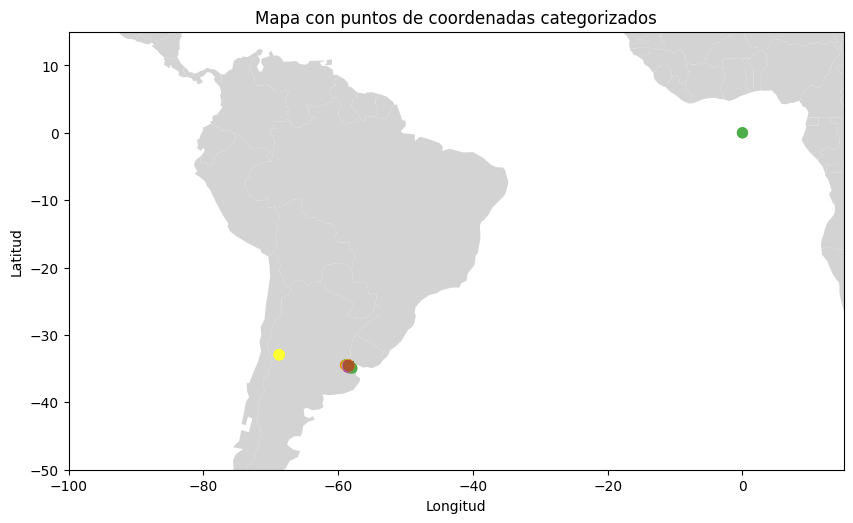

In [137]:
df_mapa = df_5[['localidad','latitud','longitud']].copy()
df_mapa = df_5[df_5['localidad'].isin(df_5.localidad.unique())]
# Crear un DataFrame de ejemplo
# Convertir el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa.longitud, df_mapa.latitud))

# Descargar un mapa base (opcional, pero recomendado para contexto geográfico)
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='localidad', legend=False, cmap='Set1', markersize=50)

# Limitar el área mostrada (ajustar según la región de interés)
ax.set_xlim(-100,15)  # Limitar el eje X (longitud) a la zona de Buenos Aires
ax.set_ylim(-50,15)
# Mostrar el gráfico
plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [138]:
# Podemos observar que existen coordenadas que se encuentra fuera de la provincia de Buenos Aires.
# Vamos a ver si podemos obtener correctamente las coordenadas
df_5[(df_5.longitud<-65)]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
26795,177936,FLORIDA 715,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.74392,20,Mayo,12.0,12.0,12,2024-06-03,12:21:00,2024-06-03,16:13:00,16:13:00
26796,177936,FLORIDA 715,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.74392,20,Mayo,12.0,12.0,12,2024-06-03,12:21:00,2024-06-03,16:13:00,16:13:00
26797,177937,Florida 832,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.74392,20,Mayo,12.0,12.0,12,2024-06-03,12:20:00,2024-06-03,16:13:00,16:13:00
26798,177937,Florida 832,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.74392,20,Mayo,12.0,12.0,12,2024-06-03,12:20:00,2024-06-03,16:13:00,16:13:00
26799,177938,FLORIDA 526,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.74392,20,Mayo,12.0,12.0,12,2024-06-03,12:22:00,2024-06-03,16:13:00,16:13:00
26800,177938,FLORIDA 526,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.74392,20,Mayo,12.0,12.0,12,2024-06-03,12:22:00,2024-06-03,16:13:00,16:13:00


In [139]:
# Parece que las filas con la direccion "FLORIDA 715" son de Retiro, CABA.
# Consecuentemente, para no perder todos los datos de la fila de Mendoza, 
# vamos a asignarle los mismos datos geográficos que la de la fila de CABA
df_5[df_5.direccion == 'FLORIDA 715']

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
24545,165596,FLORIDA 715,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.599707,-58.375275,20,Mayo,2.0,19.5,2,2024-05-14,12:16:00,2024-05-14,11:09:58,11:18:58
24546,165596,FLORIDA 715,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.599707,-58.375275,20,Junio,2.0,10.8,2,2024-06-12,12:24:00,2024-06-12,14:17:40,14:36:41
24547,165596,FLORIDA 715,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.599707,-58.375275,20,Julio,4.0,30.3,4,2024-07-23,12:44:00,2024-07-23,16:27:00,16:27:00
24548,165596,FLORIDA 715,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.599707,-58.375275,20,Julio,2.0,11.9,2,2024-07-16,12:39:00,2024-07-16,13:22:37,13:41:19
24549,165596,FLORIDA 715,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.599707,-58.375275,20,Julio,3.0,24.9,3,2024-07-30,12:24:00,2024-07-30,17:01:00,17:01:00
26795,177936,FLORIDA 715,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.743920,20,Mayo,12.0,12.0,12,2024-06-03,12:21:00,2024-06-03,16:13:00,16:13:00
26796,177936,FLORIDA 715,Mendoza,Guaymallén,Rodeo de la Cruz,901,1401,-32.935023,-68.743920,20,Mayo,12.0,12.0,12,2024-06-03,12:21:00,2024-06-03,16:13:00,16:13:00


In [140]:
indice = df_5[(df_5['direccion'] == 'FLORIDA 715') & (df_5['provincia'] == 'Mendoza')].index
df_5.loc[indice, 'provincia'] = 'Ciudad Autónoma de Buenos Aires'
df_5.loc[indice, 'municipio'] = 'Comuna 1'
df_5.loc[indice, 'localidad'] = 'Retiro'
df_5.loc[indice, 'latitud']   = -34.599707
df_5.loc[indice, 'longitud']  = -58.375275
df_5.loc[indice]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
26795,177936,FLORIDA 715,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.599707,-58.375275,20,Mayo,12.0,12.0,12,2024-06-03,12:21:00,2024-06-03,16:13:00,16:13:00
26796,177936,FLORIDA 715,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.599707,-58.375275,20,Mayo,12.0,12.0,12,2024-06-03,12:21:00,2024-06-03,16:13:00,16:13:00


In [141]:
# Con la ayuda de google maps, obtuvimos las coordenadas de Florida 832 y Florida 526, de
# CABA. Así que procederemos a cambiar los valores de las filas erroneamente asignadas a la
# provincia de Mendoza con correctos valores geográficos
indice = df_5[(df_5['direccion'] == 'Florida 832') & (df_5['provincia'] == 'Mendoza')].index
df_5.loc[indice, 'provincia'] = 'Ciudad Autónoma de Buenos Aires'
df_5.loc[indice, 'municipio'] = 'Comuna 1'
df_5.loc[indice, 'localidad'] = 'Retiro'
df_5.loc[indice, 'latitud']   = -34.598191
df_5.loc[indice, 'longitud']  = -58.375485
df_5.loc[indice]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
26797,177937,Florida 832,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.598191,-58.375485,20,Mayo,12.0,12.0,12,2024-06-03,12:20:00,2024-06-03,16:13:00,16:13:00
26798,177937,Florida 832,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.598191,-58.375485,20,Mayo,12.0,12.0,12,2024-06-03,12:20:00,2024-06-03,16:13:00,16:13:00


In [142]:
indice = df_5[(df_5['direccion'] == 'FLORIDA 526') & (df_5['provincia'] == 'Mendoza')].index
df_5.loc[indice, 'provincia'] = 'Ciudad Autónoma de Buenos Aires'
df_5.loc[indice, 'municipio'] = 'Comuna 1'
df_5.loc[indice, 'localidad'] = 'Retiro'
df_5.loc[indice, 'latitud']   = -34.601784
df_5.loc[indice, 'longitud']  = -58.375313
df_5.loc[indice]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
26799,177938,FLORIDA 526,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.601784,-58.375313,20,Mayo,12.0,12.0,12,2024-06-03,12:22:00,2024-06-03,16:13:00,16:13:00
26800,177938,FLORIDA 526,Ciudad Autónoma de Buenos Aires,Comuna 1,Retiro,901,1401,-34.601784,-58.375313,20,Mayo,12.0,12.0,12,2024-06-03,12:22:00,2024-06-03,16:13:00,16:13:00


In [143]:
# A su vez, tenemos un punto que fue erroneamente asignado como que pertenece a Misiones
# cuando en realidad, buscando la direccion en google maps, esta ubicacion pertenece a
# San Telmo, CABA. Asi que le asignaremos los datos geográficos correctos
df_5[(df_5.longitud>-45)]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
24290,163957,DR ENRIQUE PINOCHETO 404,Misiones,Comandante Andresito,Integración,901,1401,0.0,0.0,20,Mayo,2.0,13.0,2,2024-05-28,12:08:00,2024-05-28,15:34:13,15:35:13
24291,163957,DR ENRIQUE PINOCHETO 404,Misiones,Comandante Andresito,Integración,901,1401,0.0,0.0,20,Julio,3.0,19.5,3,2024-07-02,12:07:00,2024-07-02,14:40:16,14:44:40


In [144]:
indice = df_5[(df_5['direccion'] == 'DR ENRIQUE PINOCHETO 404') & (df_5['provincia'] == 'Misiones')].index
df_5.loc[indice, 'provincia'] = 'Ciudad Autónoma de Buenos Aires'
df_5.loc[indice, 'municipio'] = 'Comuna 1'
df_5.loc[indice, 'localidad'] = 'San Telmo'
df_5.loc[indice, 'latitud']   = -34.628085
df_5.loc[indice, 'longitud']  = -58.370993
df_5.loc[indice]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
24290,163957,DR ENRIQUE PINOCHETO 404,Ciudad Autónoma de Buenos Aires,Comuna 1,San Telmo,901,1401,-34.628085,-58.370993,20,Mayo,2.0,13.0,2,2024-05-28,12:08:00,2024-05-28,15:34:13,15:35:13
24291,163957,DR ENRIQUE PINOCHETO 404,Ciudad Autónoma de Buenos Aires,Comuna 1,San Telmo,901,1401,-34.628085,-58.370993,20,Julio,3.0,19.5,3,2024-07-02,12:07:00,2024-07-02,14:40:16,14:44:40


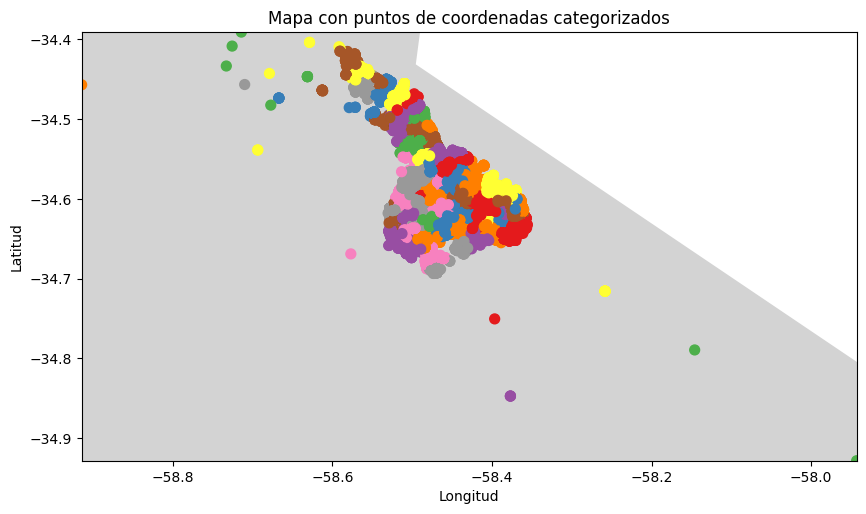

In [145]:
df_mapa = df_5[['localidad','latitud','longitud']].copy()
df_mapa = df_5[df_5['localidad'].isin(df_5.localidad.unique())]
# Crear un DataFrame de ejemplo
# Convertir el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa.longitud, df_mapa.latitud))

# Descargar un mapa base (opcional, pero recomendado para contexto geográfico)
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='localidad', legend=False, cmap='Set1', markersize=50)

# Limitar el área mostrada (ajustar según la región de interés)
ax.set_xlim(df_5.longitud.min(),df_5.longitud.max())  # Limitar el eje X (longitud) a la zona de Buenos Aires
ax.set_ylim(df_5.latitud.min(),df_5.latitud.max())
# Mostrar el gráfico
plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


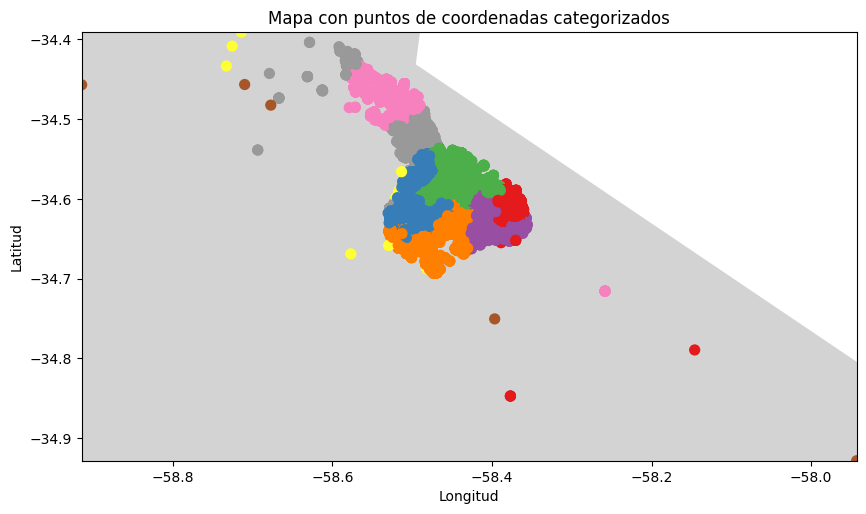

In [146]:
df_mapa = df_5[['municipio','latitud','longitud']].copy()
df_mapa = df_5[df_5['municipio'].isin(df_5.municipio.unique())]
# Crear un DataFrame de ejemplo
# Convertir el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa.longitud, df_mapa.latitud))

# Descargar un mapa base (opcional, pero recomendado para contexto geográfico)
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='municipio', legend=False, cmap='Set1', markersize=50)

# Limitar el área mostrada (ajustar según la región de interés)
ax.set_xlim(df_5.longitud.min(),df_5.longitud.max())  # Limitar el eje X (longitud) a la zona de Buenos Aires
ax.set_ylim(df_5.latitud.min(),df_5.latitud.max())
# Mostrar el gráfico
plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [147]:
df_5.tail()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
27479,183140,CASTILLO 767,Ciudad Autónoma de Buenos Aires,Comuna 15,Villa Crespo,901,1401,-34.593083,-58.436314,20,Julio,2.00,10.800,2,2024-08-01,12:52:00,2024-08-01,15:51:49,15:56:37
27480,183141,ARENALES 2699,Ciudad Autónoma de Buenos Aires,Comuna 2,Recoleta,901,1401,-34.592476,-58.404052,20,Julio,2.00,13.000,2,2024-07-31,12:30:00,2024-07-31,12:24:53,12:25:53
27481,183274,OLAZABAL 2572,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.561181,-58.459866,70,Julio,2.15,8.243,29,2024-08-01,12:10:00,2024-08-01,13:09:13,13:22:13
27482,183276,GUAMINI 2121,Ciudad Autónoma de Buenos Aires,Comuna 9,Mataderos,901,1401,-34.661128,-58.511529,20,Julio,3.00,26.000,3,2024-08-01,12:20:00,2024-08-01,13:26:20,13:34:32
27483,183277,AV. CALLAO 453,Ciudad Autónoma de Buenos Aires,Comuna 1,San Nicolás,901,1401,-34.603752,-58.392250,20,Julio,2.00,11.900,2,2024-08-01,12:19:00,2024-08-01,10:34:29,10:42:49


In [148]:
# Creamos una columna que nos dice el día en el que ocurrió cada envío
df_5['VisitaPlanificadaFecha'] = pd.to_datetime(df_5['VisitaPlanificadaFecha'])
df_5['VisitaPlanificadaDia'] = df_5['VisitaPlanificadaFecha'].dt.day_name()

df_5['VisitaFecha'] = pd.to_datetime(df_5['VisitaFecha'])
df_5['VisitaDia'] = df_5['VisitaFecha'].dt.day_name()
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin,VisitaPlanificadaDia,VisitaDia
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,14:14:53,Thursday,Thursday
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,16:43:00,Friday,Friday
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,09:50:08,Thursday,Thursday
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,1.800000,14.040,28,2024-06-13,12:14:00,2024-06-13,13:32:55,13:39:55,Thursday,Thursday
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.116667,14.377,31,2024-06-27,12:27:00,2024-06-27,15:36:00,15:36:00,Thursday,Thursday


In [149]:
df_5 = df_5[['iddomicilioorden',
            'direccion',
            'provincia',
            'municipio',
            'localidad',
            'InicioHorario1',
            'FinHorario1',
            'latitud',
            'longitud',
            'cliente',
            'mes',
            'Bultos',
            'Peso',
            'Unidades',
            'VisitaPlanificadaFecha',
            'VisitaPlanificadaDia',
            'VisitaPlanificadaHora',
            'VisitaFecha',
            'VisitaDia',
            'VisitaHora_Inicio',
            'VisitaHora_Fin',
            ]].copy()
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.516667,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.866667,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.400000,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,1.800000,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.116667,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00


In [150]:
df_5.provincia.unique().tolist()

['Ciudad Autónoma de Buenos Aires', 'Buenos Aires']

In [152]:
df_5.isna().sum()

iddomicilioorden           0
direccion                  0
provincia                  0
municipio                  0
localidad                  0
InicioHorario1             0
FinHorario1                0
latitud                    0
longitud                   0
cliente                    0
mes                        0
Bultos                     0
Peso                       0
Unidades                   0
VisitaPlanificadaFecha     0
VisitaPlanificadaDia       0
VisitaPlanificadaHora      0
VisitaFecha               52
VisitaDia                 52
VisitaHora_Inicio         52
VisitaHora_Fin            52
dtype: int64

In [153]:
# Guardamos el dataframe limpio en un csv para utilizarlo
# para el análisis de los datos
df_5.to_csv('iFlowDatos_Limpios.csv', index=False)